In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df.head()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


The Boston housing data is a built in dataset in the sklearn library of python.  You will be using two of the variables from this dataset, which are stored in **df**. The median home price in thousands of dollars and the crime per capita in the area of the home are shown above.

`1.` Use this dataframe to fit a linear model to predict the home price based on the crime rate.  Use your output to answer the first quiz below. Don't forget an intercept.

In [2]:
df['intercept']= 1
lm = sm.OLS(df['MedianHomePrice'], df[['intercept', 'CrimePerCapita']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.08e-19
Time:                        17:00:50   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         24.0162      0.409     58.676      0.000      23.212      24.820
CrimePerCapita    -0.4128      0.044     -9.389      0.000      -0.499      -0.326
==============================================================================
Omnibus:                      138.965   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.343
Skew:                           1.483   Prob(JB):                     3.30e-64
Kurtosis:                       5.251   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`2.`Plot the relationship between the crime rate and median home price below.  Use your plot and the results from the first question as necessary to answer the remaining quiz questions below.

Text(0.5,1,'MedianHomePrice vs CrimePerCapita')

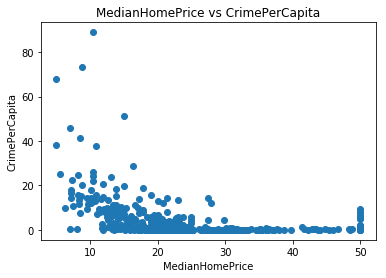

In [3]:
plt.scatter(x = 'MedianHomePrice', y = 'CrimePerCapita', data = df)
plt.xlabel('MedianHomePrice')
plt.ylabel('CrimePerCapita')
plt.title('MedianHomePrice vs CrimePerCapita')

In [4]:
correlation = df.MedianHomePrice.corr(df.CrimePerCapita)
correlation

-0.38583168988399075

In [9]:
xi = arange(0,100)
A = array([xi, ones(100)])
A

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1

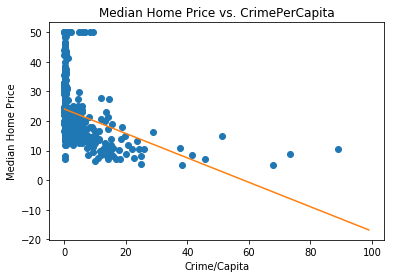

In [6]:
## To show the line that was fit I used the following code from 
## https://plot.ly/matplotlib/linear-fits/
## It isn't the greatest fit... but it isn't awful either


import plotly.plotly as py
import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats


xi = arange(0,100)
A = array([ xi, ones(100)])

# (Almost) linear sequence
y = df['MedianHomePrice']
x = df['CrimePerCapita']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*xi+intercept

plt.plot(x,y,'o', xi, line);
plt.xlabel('Crime/Capita');
plt.ylabel('Median Home Price');
pylab.title('Median Home Price vs. CrimePerCapita');

There is negative correlation between MedianHomePrice and CrimePerCapita,
14.9% of the variability in price can be explained by the crime per capita.
The p-value of 0.0 associated with crime per capita suggests that it is statistically significant in providing information in predicting the median home values. For every 100% increase in crime per capita, the expected decrease in the median home price is 412.8 dollars.
If there was no crime, we would expect the median home price to be 24016 dollars.